# Exercício 7 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 1000 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9520385265350342, 1.543312724179179e-17)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/SeventhMixture1000Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0          1         2          3
0 -0.874160  -5.402393  1.233306  -3.933340
1 -6.926642   6.848709  5.164767  -2.592649
2 -1.770807   6.411575  5.220614  -5.389074
3 -0.789322  12.066171  2.673493   0.572203
4 -3.668947 -19.488036  4.326820 -10.370779


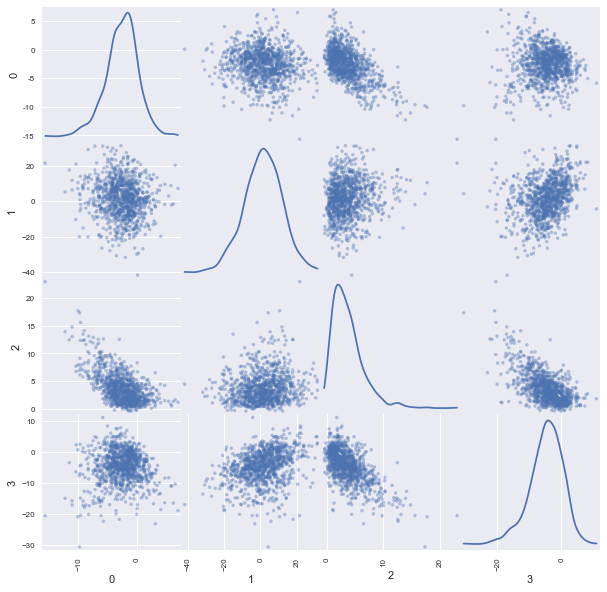

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.2246,0.5407,0.9876,1.8474e-07
1,0.1538,0.2113,0.997,0.052884
2,0.4311,19.2363,0.8858,1.6169e-26
3,0.2274,1.8411,0.9773,2.1866e-11


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures,runs = 1)

Execution time: 0.10451197624206543 seconds


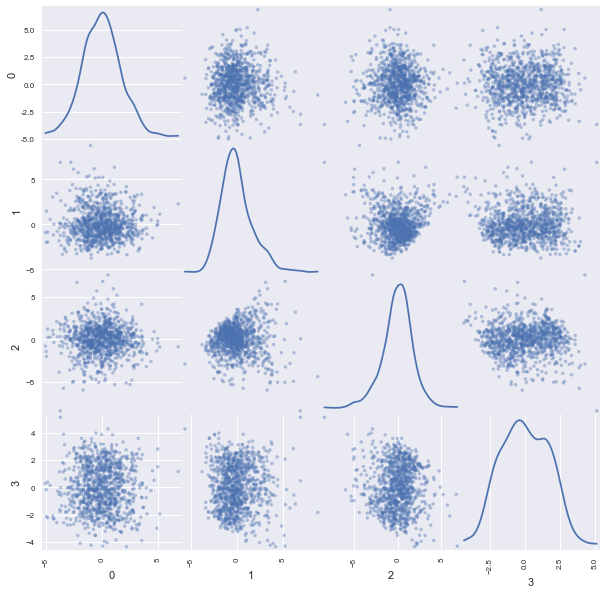

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.035,0.1334,0.9975,0.13859
1,0.2713,0.3211,0.9603,7.4611e-16
2,0.3571,0.7898,0.9815,5.6428e-10
3,0,0.1341,0.9902,3.2317e-06


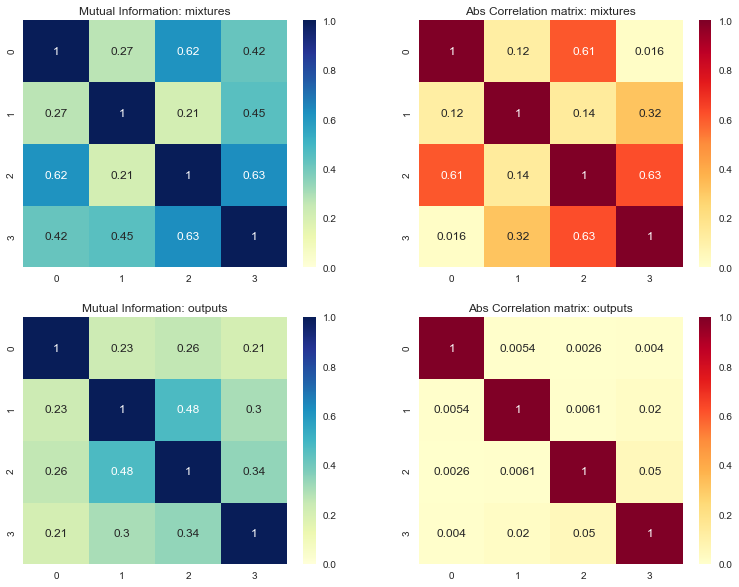

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-1, decayRate = 1e-7, runs  = 1) 

Execution time: 0.11201310157775879 seconds


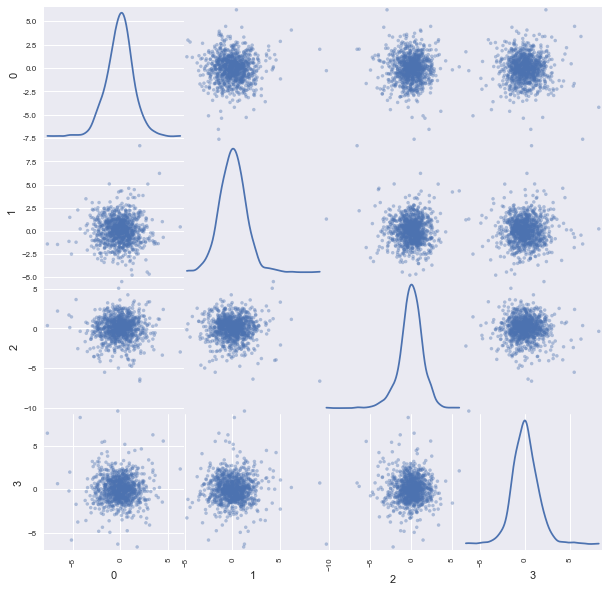

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.3569,0.2573,0.9823,1.151e-09
1,0.3398,0.7956,0.98,1.6778e-10
2,0.6093,0.8876,0.9605,8.3576e-16
3,0.5875,0.3029,0.9673,3.3596e-14


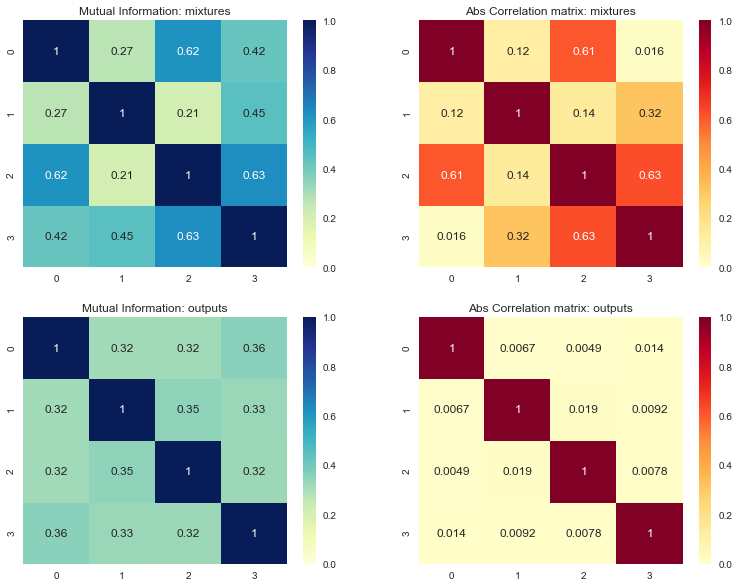

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-2, runs = 1)

Execution time: 0.07700872421264648 seconds


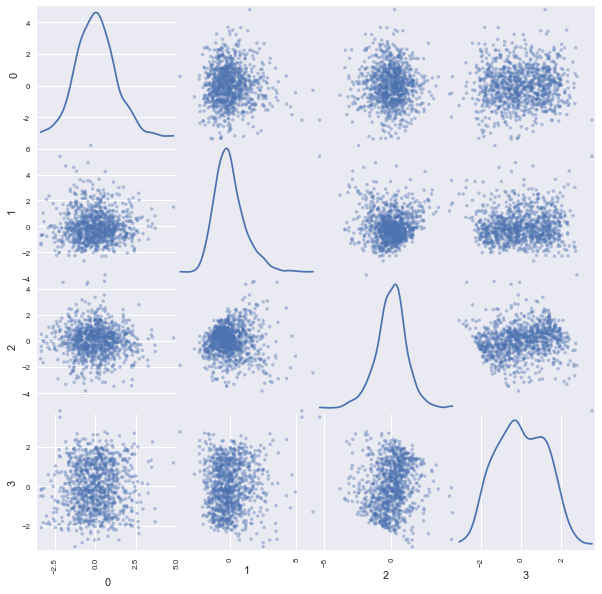

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.0638,2.0565,0.9965,0.026238
1,0.3595,0.9896,0.9518,1.3669e-17
2,0.3343,0.1782,0.9844,7.52e-09
3,0,0.0801,0.9857,2.5105e-08


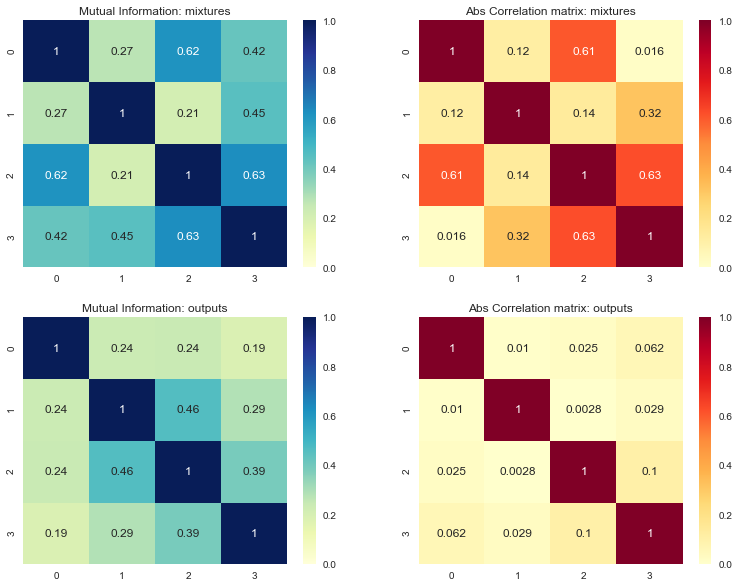

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)

# Hipóteses de PDF

In [15]:
from evaluation import graph_fittedData

Aqui o objetivo é encontrar PDFs que representem as fontes encontradas. Utiliza-se uma função que testa todas as funções de densidade probabilística implementadas no pacote SciPy em Python e verifica qual das hipóteses tem o menor $\chi ^2$.

## NPCA-RLS Algorithm

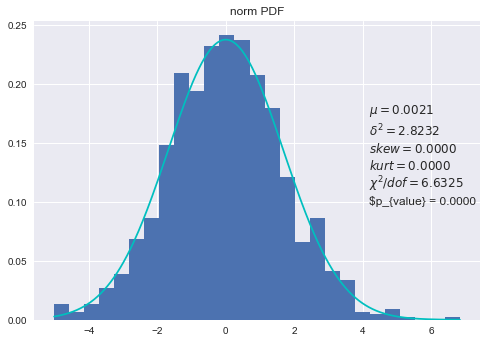

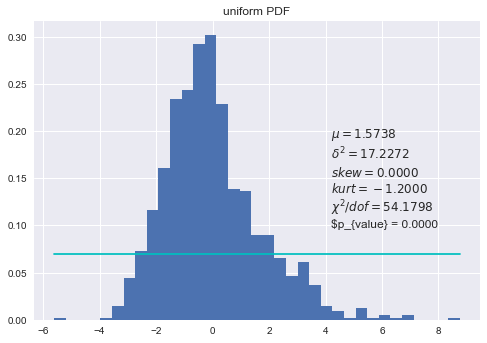

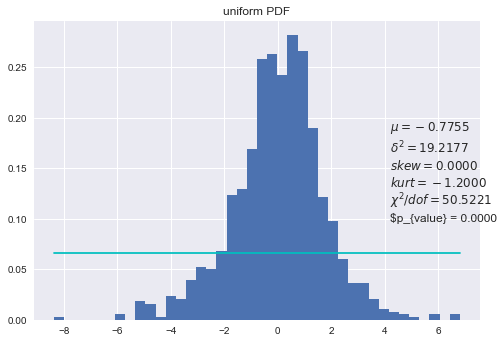

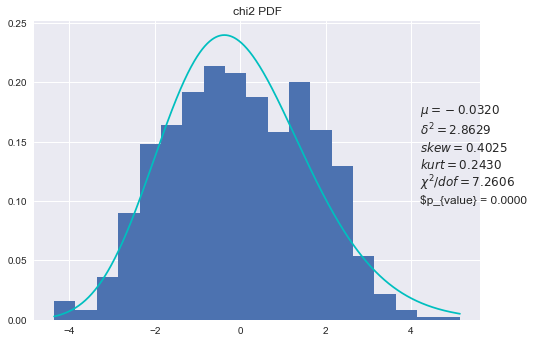

In [16]:
for i, y in enumerate(yNPCA):
    graph_fittedData(y)

## Chichocki-Unbehauen Algorithm Feedback network

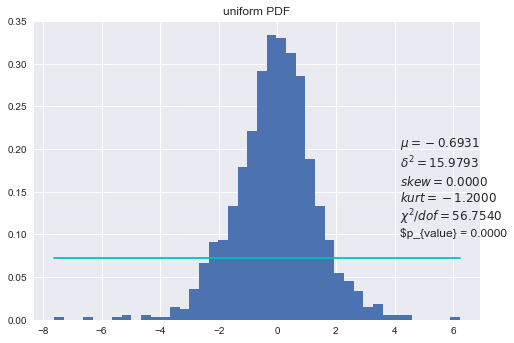

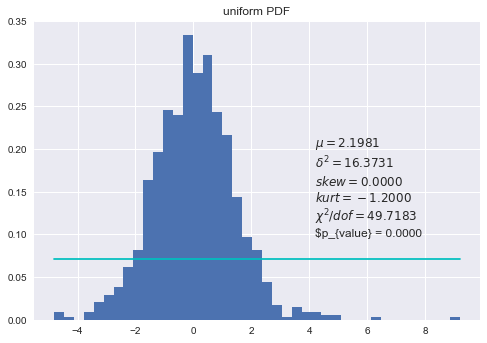

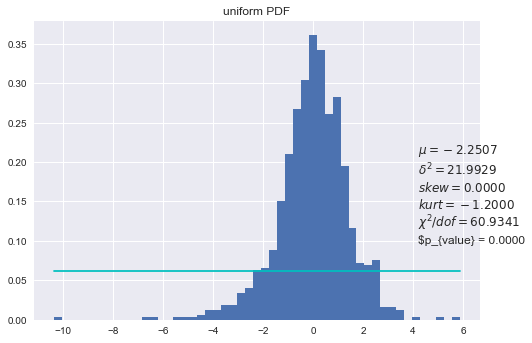

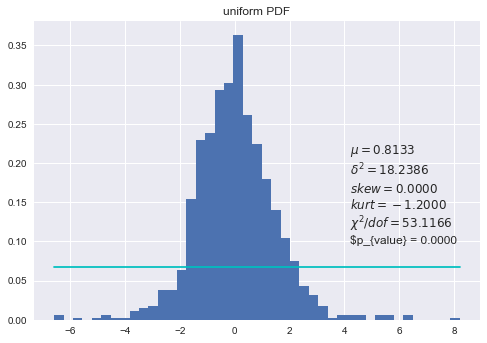

In [17]:
for i, y in enumerate(yFeedback):
    graph_fittedData(y)

## Chichocki-Unbehauen Algorithm Feedforward network

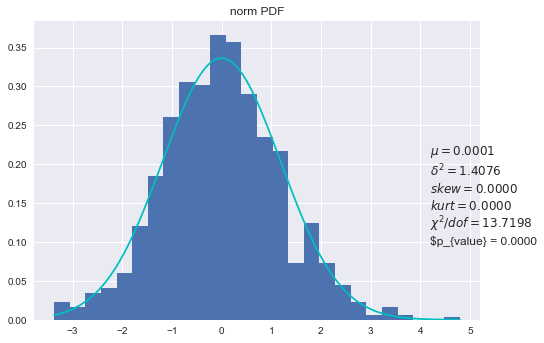

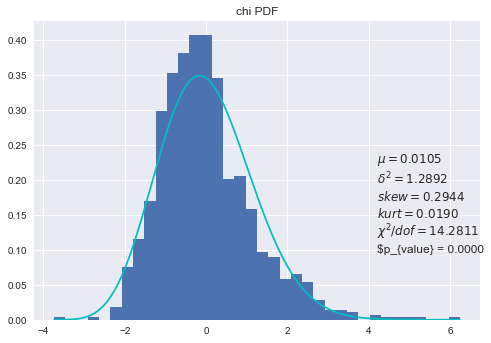

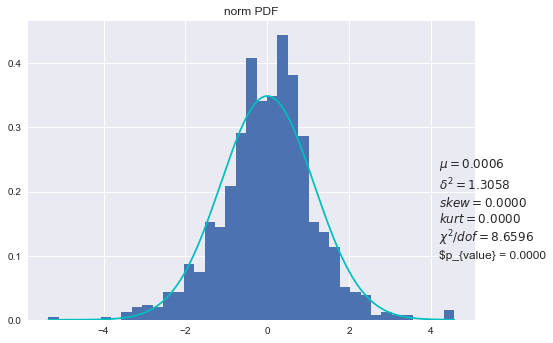

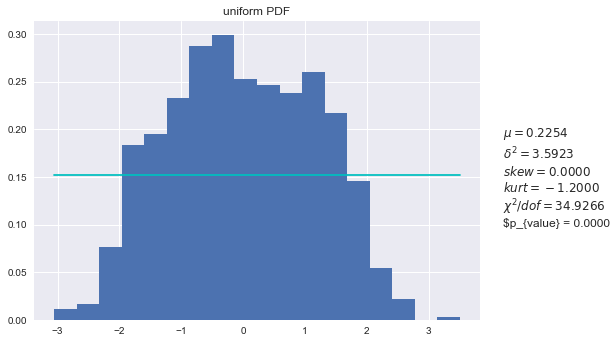

In [18]:
for i, y in enumerate(yFeedforward):
    graph_fittedData(y)

# Fontes conhecidas

In [19]:
filePathSource = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/Mixture_keys/SeventhSource1000Stats.txt'
distDataFrameSources = pd.read_table(filePathSource, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.shape)
distDataFrame.T.head()

(4, 1000)


,0,1,2,3
0,-0.874160,-5.402393,1.233306,-3.933340
1,-6.926642,6.848709,5.164767,-2.592649
2,-1.770807,6.411575,5.220614,-5.389074
3,-0.789322,12.066171,2.673493,0.572203
4,-3.668947,-19.488036,4.326820,-10.370779


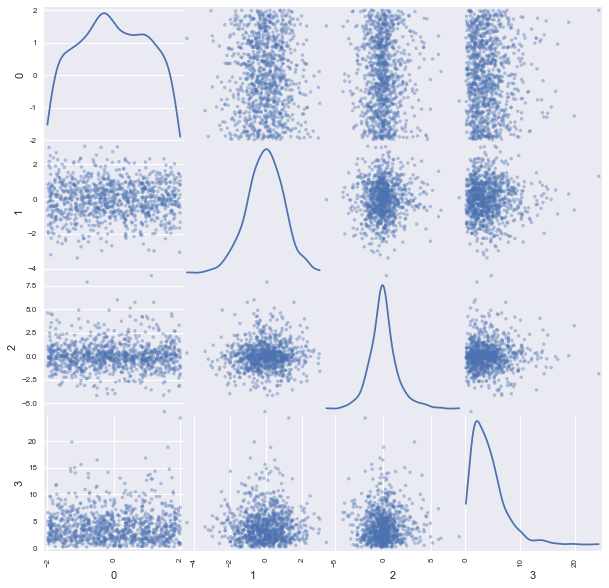

In [20]:
scatter_matrix(distDataFrameSources.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

## NPCA-RLS

(4, 1000) (4, 1000)
[[  0.8478298    1.29828232   1.22086482   0.58436586]
 [  1.03377632   1.47278544   0.16179617   0.33340345]
 [  0.14402502   0.20215317   1.01391578   0.34053397]
 [  1.87777059  10.0603516   13.34545507   1.85332811]]


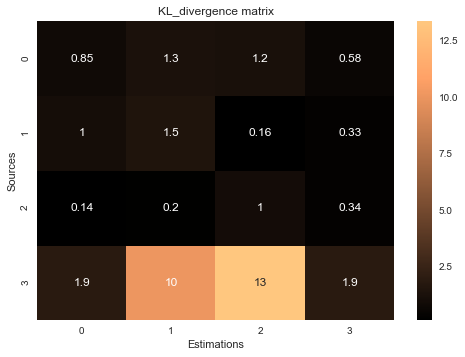

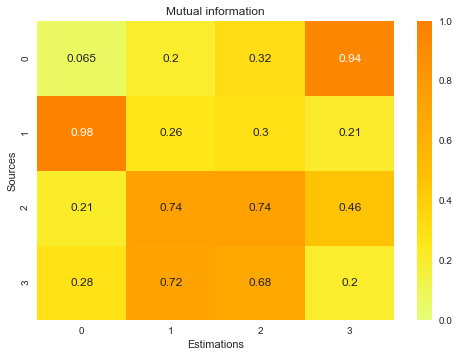

In [21]:
from evaluation import KLmatrix, MImatrix
KLmatrix(distDataFrameSources.values,yNPCA)
MImatrix(distDataFrameSources.values,yNPCA)

## Chichocki-Unbehauen Algorithm Feedback network

(4, 1000) (4, 1000)
[[  1.45218517   3.36583164   3.41066478   1.41517081]
 [  0.53856487   5.37395715   0.5847387    1.66292784]
 [  1.10367202   0.70534557   3.87965447   0.16356896]
 [ 10.51758141   1.97678216  20.21112552   6.22956227]]


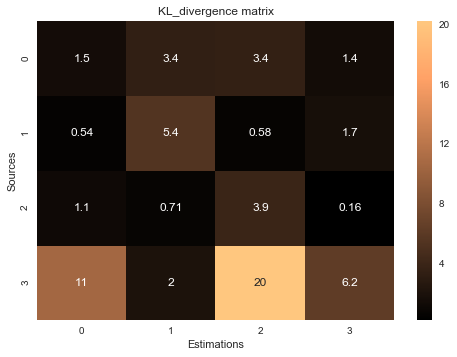

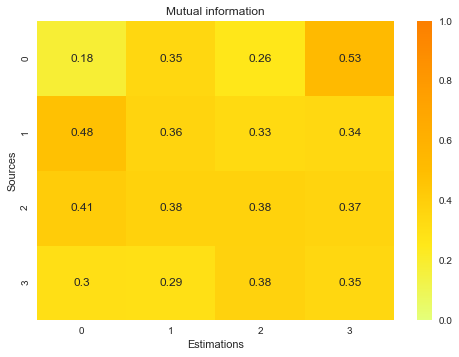

In [22]:
KLmatrix(distDataFrameSources.values,yFeedback)
MImatrix(distDataFrameSources.values,yFeedback)

## Chichocki-Unbehauen Algorithm Feedforward network

(4, 1000) (4, 1000)
[[  0.81470745   1.32601206   1.2508886    0.60093143]
 [  1.10242552   2.32671019   0.26323146   0.59818337]
 [  0.14982341   0.41924336   0.76541443   0.37944916]
 [  1.67163138  10.30229632  13.44982395   1.83202197]]


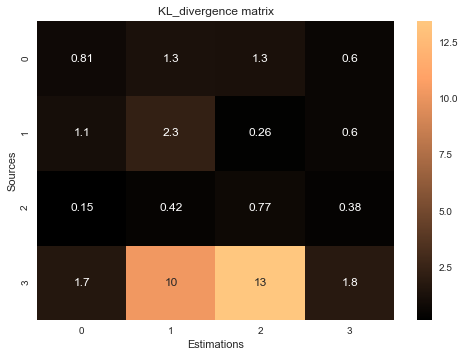

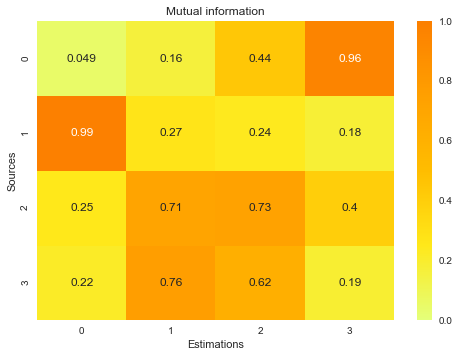

In [23]:
KLmatrix(distDataFrameSources.values,yFeedforward)
MImatrix(distDataFrameSources.values,yFeedforward)